# Exploring Crime in Chicago 2021

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import pprint


In [3]:
# Read in .csv file as a Pandas DataFrame
crime_df = pd.read_csv("Resources/Chicago_Crimes_2021.csv")
crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12343475,JE202728,4/16/2021 20:45,056XX N RIDGE AVE,820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,...,48.0,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
1,12602803,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,...,8.0,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2,12565821,JE475344,12/11/2021 20:00,077XX S MAY ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,17.0,71,17,1169996.0,1853419.0,2021,9/27/2022 16:46,41.753274,-87.652598,"(41.753274445, -87.652598299)"
3,12540388,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,...,6.0,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,12541139,JE445494,11/14/2021 4:00,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208625,12535828,JE398672,10/5/2021 10:10,033XX W FILLMORE ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,24.0,29,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN
208626,12534902,JE326823,8/5/2021 9:35,004XX S PULASKI RD,2027,NARCOTICS,POSSESS - CRACK,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,28.0,26,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN
208627,12542244,JE366136,9/8/2021 15:10,033XX W FILLMORE ST,2027,NARCOTICS,POSSESS - CRACK,POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,24.0,29,18,NaN,NaN,2021,1/7/2023 15:50,NaN,NaN,NaN
208628,12503194,JE301272,7/14/2021 13:00,100XX W OHARE ST,2091,NARCOTICS,FORFEIT PROPERTY,AIRPORT/AIRCRAFT,True,False,...,41.0,76,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN


In [4]:
# Find out what columns are in the data frame
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
# Count the number of each crime committed
counts_crime = crime_df["Primary Type"].value_counts()
counts_crime

THEFT                                40790
BATTERY                              40458
CRIMINAL DAMAGE                      25094
ASSAULT                              20342
DECEPTIVE PRACTICE                   17255
OTHER OFFENSE                        13936
MOTOR VEHICLE THEFT                  10599
WEAPONS VIOLATION                     8980
ROBBERY                               7917
BURGLARY                              6658
NARCOTICS                             5337
CRIMINAL TRESPASS                     3406
OFFENSE INVOLVING CHILDREN            1902
CRIMINAL SEXUAL ASSAULT               1498
SEX OFFENSE                           1088
HOMICIDE                               810
PUBLIC PEACE VIOLATION                 602
ARSON                                  529
STALKING                               370
INTERFERENCE WITH PUBLIC OFFICER       314
LIQUOR LAW VIOLATION                   184
CONCEALED CARRY LICENSE VIOLATION      173
INTIMIDATION                           123
PROSTITUTIO

In [6]:
# Group crimes by district
district_df = crime_df.groupby(["District"])["Primary Type"].value_counts()
district_df

District  Primary Type                     
1         THEFT                                3056
          BATTERY                              1524
          DECEPTIVE PRACTICE                    909
          ASSAULT                               687
          CRIMINAL DAMAGE                       648
                                               ... 
31        CONCEALED CARRY LICENSE VIOLATION       1
          CRIMINAL TRESPASS                       1
          DECEPTIVE PRACTICE                      1
          OFFENSE INVOLVING CHILDREN              1
          OTHER OFFENSE                           1
Name: Primary Type, Length: 585, dtype: int64

In [7]:
# Group crimes into like groups
crime_cleaned_df = crime_df.replace({"KIDNAPPING" : "KIDNAPPING AND HUMAN TRAFFICKING", 
                                    "HUMAN TRAFFICKING" : "KIDNAPPING AND HUMAN TRAFFICKING",
                                    "NARCOTICS" : "DRUG RELATED",
                                    "OTHER NARCOTIC VIOLATION" : "DRUG RELATED",
                                    "ASSAULT": "ASSAULT & BATTERY",
                                    "BATTERY": "ASSAULT & BATTERY",
                                    "RITUALISM": "ASSAULT & BATTERY",
                                    "STALKING": "ASSAULT & BATTERY",
                                    "INTIMIDATION": "ASSAULT & BATTERY",
                                    "PUBLIC PEACE VIOLATION":"OTHER MINOR CRIMES",
                                    "INTERFERENCE WITH PUBLIC OFFICER":"OTHER MINOR CRIMES",
                                    "LIQUOR LAW VIOLATION":"OTHER MINOR CRIMES",
                                    "OBSCENITY":"OTHER MINOR CRIMES",
                                    "GAMBLING":"OTHER MINOR CRIMES",
                                    "NON-CRIMINAL":"OTHER MINOR CRIMES",
                                    "PUBLIC INDECENCY":"OTHER MINOR CRIMES",
                                    "OTHER OFFENSE":"OTHER MINOR CRIMES",
                                    "PROSTITUTION":"OTHER MINOR CRIMES",
                                    "THEFT":"THEFT (ALL TYPES)",
                                    "MOTOR VEHICLE THEFT":"THEFT (ALL TYPES)", 
                                    "ROBBERY":"THEFT (ALL TYPES)", 
                                    "BURGLARY":"THEFT (ALL TYPES)",
                                    "DECEPTIVE PRACTICE":"THEFT (ALL TYPES)",
                                    "CRIM SEXUAL ASSAULT": "SEXUAL RELATED CRIME",
                                    "CRIMINAL SEXUAL ASSAULT": "SEXUAL RELATED CRIME",
                                    "SEX OFFENSE": "SEXUAL RELATED CRIME",
                                    "CRIMINAL TRESPASS":"MINOR PROPERTY CRIME",
                                    "CRIMINAL DAMAGE":"MINOR PROPERTY CRIME",
                                    "WEAPONS VIOLATION":"WEAPONS RELATED CRIME",
                                    "CONCEALED CARRY LICENSE VIOLATION":"WEAPONS RELATED CRIME"})
crime_cleaned_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12343475,JE202728,4/16/2021 20:45,056XX N RIDGE AVE,820,THEFT (ALL TYPES),$500 AND UNDER,OTHER (SPECIFY),False,False,...,48.0,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
1,12602803,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,500E,OTHER MINOR CRIMES,EAVESDROPPING,OTHER (SPECIFY),False,False,...,8.0,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2,12565821,JE475344,12/11/2021 20:00,077XX S MAY ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,17.0,71,17,1169996.0,1853419.0,2021,9/27/2022 16:46,41.753274,-87.652598,"(41.753274445, -87.652598299)"
3,12540388,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,850,THEFT (ALL TYPES),ATTEMPT THEFT,CONVENIENCE STORE,False,False,...,6.0,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,12541139,JE445494,11/14/2021 4:00,034XX W 38TH ST,486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208625,12535828,JE398672,10/5/2021 10:10,033XX W FILLMORE ST,2093,DRUG RELATED,FOUND SUSPECT NARCOTICS,POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,24.0,29,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN
208626,12534902,JE326823,8/5/2021 9:35,004XX S PULASKI RD,2027,DRUG RELATED,POSSESS - CRACK,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,28.0,26,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN
208627,12542244,JE366136,9/8/2021 15:10,033XX W FILLMORE ST,2027,DRUG RELATED,POSSESS - CRACK,POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,24.0,29,18,NaN,NaN,2021,1/7/2023 15:50,NaN,NaN,NaN
208628,12503194,JE301272,7/14/2021 13:00,100XX W OHARE ST,2091,DRUG RELATED,FORFEIT PROPERTY,AIRPORT/AIRCRAFT,True,False,...,41.0,76,18,NaN,NaN,2021,1/3/2023 15:56,NaN,NaN,NaN


In [8]:
# Pick columns we want to look at
crime_cleaned_df = crime_cleaned_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude", "Location"]]
crime_cleaned_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location
0,JE202728,4/16/2021 20:45,056XX N RIDGE AVE,THEFT (ALL TYPES),$500 AND UNDER,20,48.0,2021,NaN,NaN,NaN
1,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,OTHER MINOR CRIMES,EAVESDROPPING,4,8.0,2021,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2,JE475344,12/11/2021 20:00,077XX S MAY ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,6,17.0,2021,41.753274,-87.652598,"(41.753274445, -87.652598299)"
3,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,THEFT (ALL TYPES),ATTEMPT THEFT,6,6.0,2021,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,JE445494,11/14/2021 4:00,034XX W 38TH ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,9,12.0,2021,41.824317,-87.710266,"(41.824316537, -87.710266215)"
...,...,...,...,...,...,...,...,...,...,...,...
208625,JE398672,10/5/2021 10:10,033XX W FILLMORE ST,DRUG RELATED,FOUND SUSPECT NARCOTICS,11,24.0,2021,NaN,NaN,NaN
208626,JE326823,8/5/2021 9:35,004XX S PULASKI RD,DRUG RELATED,POSSESS - CRACK,11,28.0,2021,NaN,NaN,NaN
208627,JE366136,9/8/2021 15:10,033XX W FILLMORE ST,DRUG RELATED,POSSESS - CRACK,11,24.0,2021,NaN,NaN,NaN
208628,JE301272,7/14/2021 13:00,100XX W OHARE ST,DRUG RELATED,FORFEIT PROPERTY,16,41.0,2021,NaN,NaN,NaN


In [9]:
# Get the counts of the "Primary Type" of crime committed
counts_crime = crime_cleaned_df["Primary Type"].value_counts()
counts_crime

THEFT (ALL TYPES)                   83219
ASSAULT & BATTERY                   61293
MINOR PROPERTY CRIME                28500
OTHER MINOR CRIMES                  15202
WEAPONS RELATED CRIME                9153
DRUG RELATED                         5339
SEXUAL RELATED CRIME                 2586
OFFENSE INVOLVING CHILDREN           1902
HOMICIDE                              810
ARSON                                 529
KIDNAPPING AND HUMAN TRAFFICKING       97
Name: Primary Type, dtype: int64

In [10]:
# Look at percentage of total crimes each category represents
percentage_crime = pd.DataFrame(counts_crime)
percentage_crime["Percent of Total Crime"] = round(percentage_crime["Primary Type"] / sum(percentage_crime["Primary Type"]),4)*100

percentage_crime

,Primary Type,Percent of Total Crime
THEFT (ALL TYPES),83219,39.89
ASSAULT & BATTERY,61293,29.38
MINOR PROPERTY CRIME,28500,13.66
OTHER MINOR CRIMES,15202,7.29
WEAPONS RELATED CRIME,9153,4.39
DRUG RELATED,5339,2.56
SEXUAL RELATED CRIME,2586,1.24
OFFENSE INVOLVING CHILDREN,1902,0.91
HOMICIDE,810,0.39
ARSON,529,0.25


In [11]:
# Look at which district had the most crimes
district_df = crime_cleaned_df.groupby(["District"])[["Primary Type"]].count().sort_values(by = "Primary Type", ascending = False)
district_df



,Primary Type
District,
11,13935
6,13571
8,12850
4,12415
12,10893
25,10830
3,10560
7,10537
18,10135


Text(0, 0.5, 'Count')

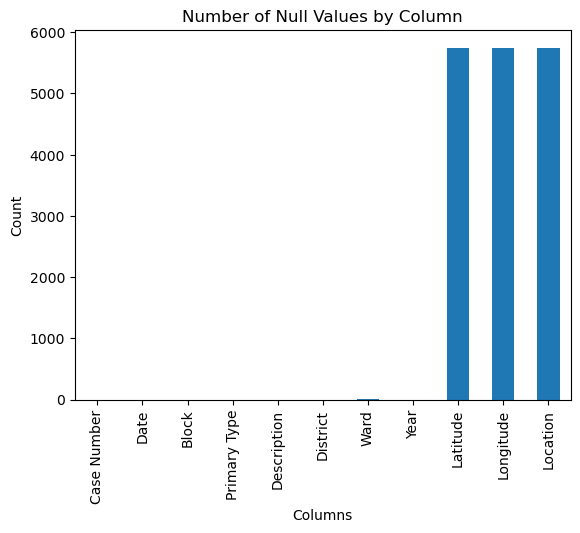

In [12]:
# Create a bar chart to see the null values
null_count = crime_cleaned_df.isnull().sum()
null_count.plot(kind = "bar")
plt.title("Number of Null Values by Column")
plt.xlabel("Columns")
plt.ylabel("Count")

In [13]:
# Look at which crimes were most prevalent by district
grouped_district_df = crime_cleaned_df.groupby(["District"])["Primary Type"].value_counts()
grouped_district_df



District  Primary Type              
1         THEFT (ALL TYPES)             5046
          ASSAULT & BATTERY             2231
          MINOR PROPERTY CRIME           923
          OTHER MINOR CRIMES             518
          WEAPONS RELATED CRIME          200
                                        ... 
31        THEFT (ALL TYPES)                4
          MINOR PROPERTY CRIME             3
          OFFENSE INVOLVING CHILDREN       1
          OTHER MINOR CRIMES               1
          WEAPONS RELATED CRIME            1
Name: Primary Type, Length: 246, dtype: int64

In [14]:
# Drop rows without a latitude or longitude for API lookup of the zip code from the latitude and longitude
crime_cleaned_df = crime_cleaned_df.dropna(how = "any")
crime_cleaned_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location
1,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,OTHER MINOR CRIMES,EAVESDROPPING,4,8.0,2021,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2,JE475344,12/11/2021 20:00,077XX S MAY ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,6,17.0,2021,41.753274,-87.652598,"(41.753274445, -87.652598299)"
3,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,THEFT (ALL TYPES),ATTEMPT THEFT,6,6.0,2021,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,JE445494,11/14/2021 4:00,034XX W 38TH ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,9,12.0,2021,41.824317,-87.710266,"(41.824316537, -87.710266215)"
5,JE328996,8/7/2021 2:36,131XX S FORRESTVILLE AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,5,9.0,2021,41.658679,-87.602776,"(41.658678993, -87.602776239)"
...,...,...,...,...,...,...,...,...,...,...,...
208580,JE340482,8/17/2021 14:30,048XX W FULTON ST,HOMICIDE,FIRST DEGREE MURDER,15,28.0,2021,41.885721,-87.747125,"(41.885721317, -87.747124924)"
208581,JE374548,9/15/2021 14:25,011XX N PULASKI RD,HOMICIDE,FIRST DEGREE MURDER,11,37.0,2021,41.901807,-87.726279,"(41.901806786, -87.72627855)"
208591,JF270550,7/11/2021 11:38,054XX W BYRON ST,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,16,30.0,2021,41.951461,-87.762683,"(41.951460934, -87.76268349)"
208592,JF289469,2/8/2021 0:00,011XX S CENTRAL PARK AVE,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,11,24.0,2021,41.866957,-87.715440,"(41.866957425, -87.715440128)"


In [15]:
# Copy crime_cleaned_df
api_crime = crime_cleaned_df.copy()
api_crime

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location
1,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,OTHER MINOR CRIMES,EAVESDROPPING,4,8.0,2021,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2,JE475344,12/11/2021 20:00,077XX S MAY ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,6,17.0,2021,41.753274,-87.652598,"(41.753274445, -87.652598299)"
3,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,THEFT (ALL TYPES),ATTEMPT THEFT,6,6.0,2021,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,JE445494,11/14/2021 4:00,034XX W 38TH ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,9,12.0,2021,41.824317,-87.710266,"(41.824316537, -87.710266215)"
5,JE328996,8/7/2021 2:36,131XX S FORRESTVILLE AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,5,9.0,2021,41.658679,-87.602776,"(41.658678993, -87.602776239)"
...,...,...,...,...,...,...,...,...,...,...,...
208580,JE340482,8/17/2021 14:30,048XX W FULTON ST,HOMICIDE,FIRST DEGREE MURDER,15,28.0,2021,41.885721,-87.747125,"(41.885721317, -87.747124924)"
208581,JE374548,9/15/2021 14:25,011XX N PULASKI RD,HOMICIDE,FIRST DEGREE MURDER,11,37.0,2021,41.901807,-87.726279,"(41.901806786, -87.72627855)"
208591,JF270550,7/11/2021 11:38,054XX W BYRON ST,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,16,30.0,2021,41.951461,-87.762683,"(41.951460934, -87.76268349)"
208592,JF289469,2/8/2021 0:00,011XX S CENTRAL PARK AVE,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,11,24.0,2021,41.866957,-87.715440,"(41.866957425, -87.715440128)"


In [16]:
# Set up column for zip code to use in Nomination API call
api_crime["Zip Code"] = "" 
api_crime  

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Zip Code
1,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,OTHER MINOR CRIMES,EAVESDROPPING,4,8.0,2021,41.742941,-87.585783,"(41.74294124, -87.585783412)",
2,JE475344,12/11/2021 20:00,077XX S MAY ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,6,17.0,2021,41.753274,-87.652598,"(41.753274445, -87.652598299)",
3,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,THEFT (ALL TYPES),ATTEMPT THEFT,6,6.0,2021,41.737751,-87.604856,"(41.737750767, -87.604855911)",
4,JE445494,11/14/2021 4:00,034XX W 38TH ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,9,12.0,2021,41.824317,-87.710266,"(41.824316537, -87.710266215)",
5,JE328996,8/7/2021 2:36,131XX S FORRESTVILLE AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,5,9.0,2021,41.658679,-87.602776,"(41.658678993, -87.602776239)",
...,...,...,...,...,...,...,...,...,...,...,...,...
208580,JE340482,8/17/2021 14:30,048XX W FULTON ST,HOMICIDE,FIRST DEGREE MURDER,15,28.0,2021,41.885721,-87.747125,"(41.885721317, -87.747124924)",
208581,JE374548,9/15/2021 14:25,011XX N PULASKI RD,HOMICIDE,FIRST DEGREE MURDER,11,37.0,2021,41.901807,-87.726279,"(41.901806786, -87.72627855)",
208591,JF270550,7/11/2021 11:38,054XX W BYRON ST,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,16,30.0,2021,41.951461,-87.762683,"(41.951460934, -87.76268349)",
208592,JF289469,2/8/2021 0:00,011XX S CENTRAL PARK AVE,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,11,24.0,2021,41.866957,-87.715440,"(41.866957425, -87.715440128)",


In [17]:
# Test block for latitude and longitude
latitude = 41.849031
longitude = -87.702719

In [18]:
# Make the base url to use to gain the zip code from Nominatim API
url = f"https://nominatim.openstreetmap.org/reverse?lat={latitude}&lon={longitude}&format=json"
# Make a request using the base URL
response = requests.get(url)
pprint.pprint(response.json())


{'address': {'ISO3166-2-lvl4': 'US-IL',
             'city': 'Chicago',
             'country': 'United States',
             'country_code': 'us',
             'county': 'Cook County',
             'house_number': '2330',
             'neighbourhood': 'Bohemian California',
             'postcode': '60623',
             'quarter': 'South Lawndale',
             'road': 'South Albany Avenue',
             'state': 'Illinois'},
 'boundingbox': ['41.8490444', '41.8491092', '-87.7030681', '-87.7028575'],
 'display_name': '2330, South Albany Avenue, Bohemian California, South '
                 'Lawndale, Chicago, Cook County, Illinois, 60623, United '
                 'States',
 'lat': '41.8490898',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '-87.70296934343035',
 'osm_id': 165242307,
 'osm_type': 'way',
 'place_id': 145681309}
